# Aula 04 - Imersão Dados

## Machine Learning

Objetivo: Prever as notas de Matemática

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)

In [28]:
#criar o total de notas
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


In [29]:
#desconsiderar total de notas zerado
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")

In [30]:
len(dados_sem_nota_zero)

98218

#### Características

In [31]:
provas_entrada = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"

In [32]:
#remover valore nulos
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

In [33]:
len(dados_sem_nota_zero)

92537

In [34]:
notas_entrada = dados_sem_nota_zero[provas_entrada]
nota_saida = dados_sem_nota_zero[prova_saida]

In [35]:
notas_entrada.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,435.6,512.3,488.6,420.0
2,423.2,499.1,441.0,560.0
3,426.2,578.1,551.5,500.0
4,516.5,571.3,511.2,780.0
5,559.6,618.7,607.5,900.0


In [36]:
nota_saida.head()

0    432.4
2    427.2
3    499.9
4    424.5
5    615.6
Name: NU_NOTA_MT, dtype: float64

In [37]:
x = notas_entrada
y = nota_saida

#### Separar dados de Treino e Teste

In [38]:
seed = 42

x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)

#### Criação do Modelo

In [39]:
modelo_svr = LinearSVR(random_state=seed)
modelo_svr.fit(x_treino, y_treino) #ajusta dados / treina modelo

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [40]:
predicoes_matematica = modelo_svr.predict(x_test)

In [41]:
y_test[:5]

89018    514.8
70569    428.2
9679     421.4
83162    588.6
69045    483.5
Name: NU_NOTA_MT, dtype: float64

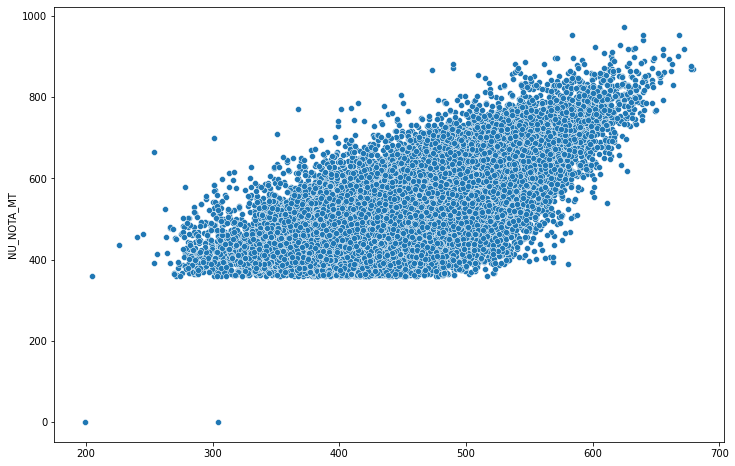

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=predicoes_matematica, y=y_test)

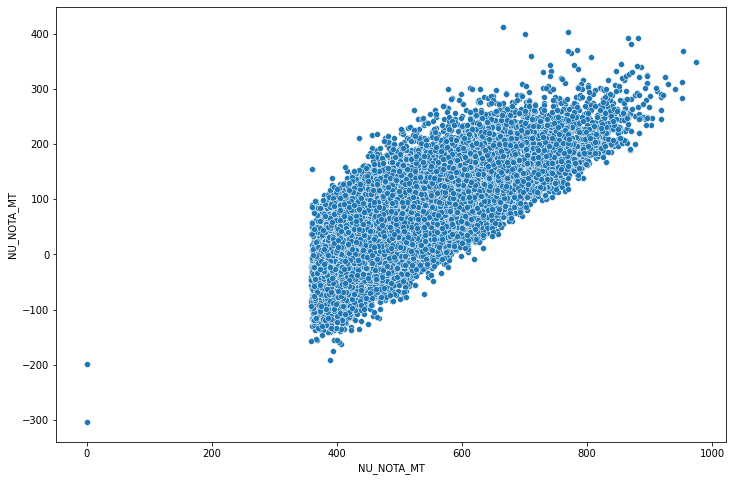

In [43]:
#analisar erro

plt.figure(figsize=(12,8))
sns.scatterplot(x=y_test, y=y_test - predicoes_matematica)

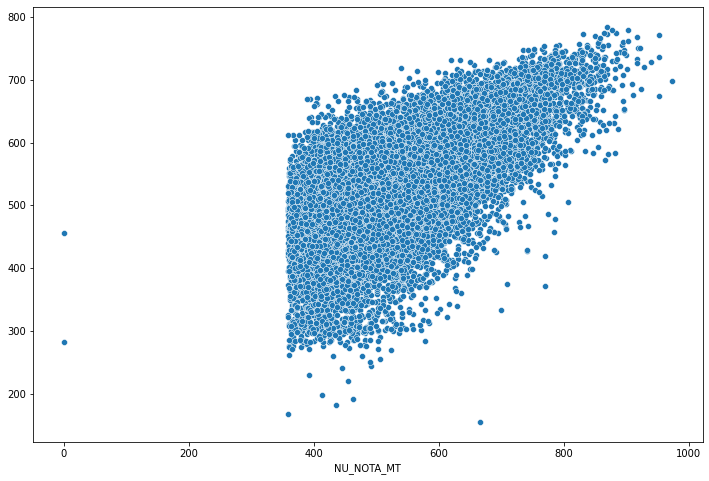

In [44]:
#testar com a media dos candidatos
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_test, y=x_test.mean(axis=1))

## Avaliação do Modelo

In [45]:
resultados = pd.DataFrame()

resultados["Real"] = y_test
resultados["Previsao"] = predicoes_matematica
resultados["Diferenca"] = resultados["Real"] - resultados["Previsao"]

resultados["Quadrado_Diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [46]:
resultados.head()

,Real,Previsao,Diferenca,Quadrado_Diferenca
89018,514.8,447.186326,67.613674,4571.608866
70569,428.2,492.145841,-63.945841,4089.070596
9679,421.4,424.984165,-3.584165,12.846237
83162,588.6,557.429473,31.170527,971.601746
69045,483.5,355.868398,127.631602,16289.825707


In [47]:
#resumo do erro quadrado
resultados["Quadrado_Diferenca"].mean()

11116.806037410264

In [48]:
resultados["Quadrado_Diferenca"].mean()**(1/2)

105.43626528576524

In [49]:
mae_svr = mean_absolute_error(y_test, predicoes_matematica)
mse_svr = mean_squared_error(y_test, predicoes_matematica)
r2_svr = r2_score(y_test, predicoes_matematica)

print('mae:', mae_svr)
print('mse:', mse_svr)
print('r2:', r2_svr)

mae: 84.1725122923832
mse: 11116.806037410239
r2: 0.06406594144302735


In [58]:
#analisar com o modelo DummyRegressor
modelo_dummy = DummyRegressor(strategy='median')
modelo_dummy.fit(x_treino, y_treino) 
predicoes_dummy = modelo_dummy.predict(x_test)

In [59]:
mae_dummy = mean_absolute_error(y_test, predicoes_dummy)
mse_dummy = mean_squared_error(y_test, predicoes_dummy)
r2_dummy = r2_score(y_test, predicoes_dummy)

print('mae:', mae_dummy)
print('mse:', mse_dummy)
print('r2:', r2_dummy)

mae: 88.46232115841798
mse: 12362.155902312514
r2: -0.04078120165356047


# Desafios

Desafio 01: Procurar outro modelo de ML para treinar e comparar com os modelos criados.

Desafio 02: Ler a documentação do Dummy e alterar o método

Desafio 03: Buscar outra métrica para avaliar modelos de regressão

#### Desafio 01: Procurar outro modelo de ML para treinar e comparar com os modelos criados.

+ Usando RandomForestRegressor

In [52]:
modelo_rfr = RandomForestRegressor()
modelo_rfr.fit(x_treino, y_treino)

predicoes_modelo_rfr = modelo_rfr.predict(x_test)

In [53]:
mae_rfr = mean_absolute_error(y_test, predicoes_modelo_rfr)
mse_rfr = mean_squared_error(y_test, predicoes_modelo_rfr)
r2_rfr = r2_score(y_test, predicoes_modelo_rfr)

print('mae:', mae_rfr)
print('mse:', mse_rfr)
print('r2:', r2_rfr)

mae: 60.595957121244865
mse: 5769.769240003113
r2: 0.5142378554091154


+ Usando GradientBoostingRegressor

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [54]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = GradientBoostingRegressor(**params)
reg.fit(x_treino, y_treino)

predicoes_GradientBoosting = reg.predict(x_test)

mse_gradientBoosting = mean_squared_error(y_test, predicoes_GradientBoosting)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_gradientBoosting))

The mean squared error (MSE) on test set: 5360.3331


In [56]:
mae_gradientBoosting = mean_absolute_error(y_test, predicoes_GradientBoosting)
mse_gradientBoosting = mean_squared_error(y_test, predicoes_GradientBoosting)
r2_gradientBoosting = r2_score(y_test, predicoes_GradientBoosting)

print(mae_gradientBoosting)
print(mse_gradientBoosting)
print(r2_gradientBoosting)

58.717106222190175
5360.333053484154
0.5487086620849912


#### Desafio 03: Buscar outra métrica para avaliar modelos de regressão

## Comparações Métricas

> **Métricas utilizadas:**

**MAE:** É a média da diferença absoluta entre os valores reais e os valores preditos.

Perda de regressão de erro médio absoluto.

A saída MAE é um ponto flutuante não negativo. O melhor valor é 0,0.

**MSE:** É a média da diferença quadrada entre os valores reais e os valores preditos.

Valor sempre positivo e quanto menor melhor

**R²:** Quantifica a diferença entre a linha elaborada pelo equação do modelo de regressão e a média.

Valor que varia de 0 a 1, sendo 0 o indicador que o modelo proposto não melhora a predição e 1 o indicador de uma predição perfeita.

Função de pontuação de regressão R ^ 2 (coeficiente de determinação).

A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior). Um modelo constante que sempre prevê o valor esperado de y, desconsiderando os recursos de entrada, obteria uma pontuação de R ^ 2 de 0,0.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [57]:
modelos = [
           ("LinearSVR", mae_svr, mse_svr, r2_svr),
           ("RandomForestRegressor", mae_rfr, mse_rfr, r2_rfr),
           ("DummyRegressor", mae_dummy, mse_dummy, r2_dummy),
           ("GradientBoostingRegressor", mae_gradientBoosting, mse_gradientBoosting, r2_gradientBoosting)
           ]

df_comparar_metrica_modelos = pd.DataFrame(data=modelos, columns=["Modelo", "MAE", "MSE", "R²"])
df_comparar_metrica_modelos.head()

,Modelo,MAE,MSE,R²
0,LinearSVR,84.172512,11116.806037,6.406594e-02
1,RandomForestRegressor,60.595957,5769.769240,5.142379e-01
2,DummyRegressor,89.966345,11877.766789,-3.954206e-08
3,GradientBoostingRegressor,58.717106,5360.333053,5.487087e-01
